In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#create a data frame and import the data from the Excel file
tourist_df = pd.read_excel('tourism_data.xlsx')

#display the first 5 rows
tourist_df.head()

,Tourist Name,Country,Arrival Date,Departure Date,Age,Gender,Purpose of Visit,Spending (USD),Feedback
0,Jonathan Rodriguez,France,2025-02-25,03-01-2025,18,Male,BUSINESS,NaN,poor
1,Andrew Woods,MR,2024-06-26,2024-07-06,47,F,Study,NaN,NaN
2,Christopher Powers,Puerto Rico,2025-03-09,2025-03-13,42,f,Business,711,bad
3,Matthew Olson,,2025-03-24,2025-04-03,41,male,Holiday,4777,bad
4,Tina Barrera,Egypt,2024-09-22,2024-10-03,NaN,f,Holiday,551.17,excelllent


In [18]:
#display the data types
tourist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Tourist Name      100000 non-null  object
 1   Country           99944 non-null   object
 2   Arrival Date      100000 non-null  object
 3   Departure Date    100000 non-null  object
 4   Age               60017 non-null   object
 5   Gender            100000 non-null  object
 6   Purpose of Visit  87575 non-null   object
 7   Spending (USD)    60291 non-null   object
 8   Feedback          90119 non-null   object
dtypes: object(9)
memory usage: 6.9+ MB


In [19]:
#check for nulls
tourist_df.isnull().sum()

Tourist Name            0
Country                56
Arrival Date            0
Departure Date          0
Age                 39983
Gender                  0
Purpose of Visit    12425
Spending (USD)      39709
Feedback             9881
dtype: int64

In [20]:
#create a new data frame to clean data
tourist_df_clean = tourist_df


In [21]:
#replace null values in Country column with 'Unknown'
tourist_df_clean['Country'] = tourist_df_clean['Country'].fillna('Unknown')

In [22]:
#change the type of the Age column to be numeric while setting the errors (strings) to NaN
tourist_df_clean['Age'] = pd.to_numeric(tourist_df_clean['Age'], errors='coerce')

In [23]:
#replace null values in Age column with '-1' to indicate it's a missing value as filling it with mean could skew the data
tourist_df_clean['Age'] = tourist_df_clean['Age'].fillna(-1).astype('Int64')

In [24]:
#replace null values in Purpose of Visit column with 'Unknown'
tourist_df_clean['Purpose of Visit'] = tourist_df_clean['Purpose of Visit'].fillna('Unknown')

In [25]:
#change the type of the Spending (USD) column to be numeric while setting the errors (strings) to NaN
tourist_df_clean['Spending (USD)'] = pd.to_numeric(tourist_df_clean['Spending (USD)'], errors='coerce')

In [26]:
#replace null values in Spending (USD) column with the mean to avoid skewing the data
tourist_df_clean['Spending (USD)'] = tourist_df_clean['Spending (USD)'].fillna(tourist_df_clean['Spending (USD)'].mean())

In [27]:
#replace null values in Feedback column with 'No feedback'
tourist_df_clean['Feedback'] = tourist_df_clean['Feedback'].fillna('No feedback')

In [28]:
#check for nulls in the cleaned data frame
tourist_df_clean.isnull().sum()

Tourist Name        0
Country             0
Arrival Date        0
Departure Date      0
Age                 0
Gender              0
Purpose of Visit    0
Spending (USD)      0
Feedback            0
dtype: int64

In [29]:
#display the data types of the cleaned data frame
tourist_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Tourist Name      100000 non-null  object 
 1   Country           100000 non-null  object 
 2   Arrival Date      100000 non-null  object 
 3   Departure Date    100000 non-null  object 
 4   Age               100000 non-null  Int64  
 5   Gender            100000 non-null  object 
 6   Purpose of Visit  100000 non-null  object 
 7   Spending (USD)    100000 non-null  float64
 8   Feedback          100000 non-null  object 
dtypes: Int64(1), float64(1), object(7)
memory usage: 7.0+ MB


In [30]:
#check for all unique values in the Country column
tourist_df_clean['Country'].unique()

array(['France', 'MR', 'Puerto Rico', ' ', 'Egypt', 'India', 'UK',
       'China', 'Equatorial Guinea', 'KE', 'Spain', 'Mexico', 'BN',
       'Germany', 'PS', 'Togo', 'USA', 'SV', 'VA', 'SL', 'ZM', 'NZ',
       'Jersey', 'LT', 'BG', 'Senegal', 'Canada', 'Antigua and Barbuda',
       'San Marino', 'BW', 'NI', 'Bahamas', 'ST', 'OM', 'MC', 'Honduras',
       'Vietnam', 'Brunei Darussalam', 'MT', 'BY', 'Estonia',
       'Northern Mariana Islands', 'Heard Island and McDonald Islands',
       'Saint Martin', 'TH', 'Korea', 'IE', 'Ecuador', 'Chile', 'PT',
       'DO', 'RO', 'Sierra Leone', 'BH', 'Macao', 'GB', 'Morocco',
       'Taiwan', 'CF', 'ZA', 'Armenia', 'Argentina', 'MW', 'NR',
       'Libyan Arab Jamahiriya', 'LB', 'SM', 'IL',
       'British Indian Ocean Territory (Chagos Archipelago)', 'MG',
       'Iran', 'Iceland', 'BD', 'PY', 'Croatia', 'Unknown', 'VE',
       'French Guiana', 'Indonesia', 'Saint Lucia', 'Tajikistan', 'FI',
       'Ukraine', 'Palestinian Territory', 'CD', 'HT', '

In [31]:
#remove whitespaces in the country column
tourist_df_clean['Country'] = tourist_df_clean['Country'].str.strip()
tourist_df_clean['Country'] = tourist_df_clean['Country'].replace('', 'Unknown')
#remove whitespaces in the Tourist Name column
tourist_df_clean['Tourist Name'] = tourist_df_clean['Tourist Name'].str.strip()
tourist_df_clean['Tourist Name'] = tourist_df_clean['Tourist Name'].replace('', 'Unknown')

In [32]:
#standardize all country name variants
country_replacements = {
    'USA': 'United States',
    'US': 'United States',
    'United States of America': 'United States',
    'United States Minor Outlying Islands': 'United States',
    'United States Virgin Islands': 'United States',
    'UK': 'United Kingdom',
    'GB': 'United Kingdom',
    'Great Britain': 'United Kingdom',
    'RU': 'Russia',
    'Russian Federation': 'Russia',
    'KR': 'South Korea',
    'Korea': 'South Korea',
    'Korea, Republic of': 'South Korea',
    'KP': 'North Korea',
    'IR': 'Iran',
    'Islamic Republic of Iran': 'Iran',
    'IRN': 'Iran',
    'CN': 'China',
    'EG': 'Egypt',
    'FR': 'France',
    'DE': 'Germany',
    'BR': 'Brazil',
    'IN': 'India',
    'CA': 'Canada',
    'AU': 'Australia',
    'ZA': 'South Africa',
    'AE': 'United Arab Emirates',
    'VN': 'Vietnam',
    'SY': 'Syria',
    'Syrian Arab Republic': 'Syria',
    'TW': 'Taiwan',
    'Libyan Arab Jamahiriya': 'Libya',
    'LY': 'Libya',
    "Cote d'Ivoire": 'Ivory Coast',
    'CI': 'Ivory Coast',
    'VE': 'Venezuela',
    'BO': 'Bolivia',
    'TZ': 'Tanzania',
    'Czech Republic': 'Czechia',
    'Macedonia': 'North Macedonia',
    'MD': 'Moldova',
    'SZ': 'Eswatini',
    'MM': 'Myanmar',
    'Burma': 'Myanmar',
    'LA': 'Laos',
    "Lao People's Democratic Republic": 'Laos',
    'Palestinian Territory': 'Palestine',
    'PS': 'Palestine',
    'FM': 'Micronesia',
    'JP': 'Japan',
    'IT': 'Italy',
    'ES': 'Spain',
    'GR': 'Greece',
    'NL': 'Netherlands',
    'SE': 'Sweden',
    'NO': 'Norway',
    'CH': 'Switzerland',
    'BE': 'Belgium',
    'FI': 'Finland',
    'DK': 'Denmark',
    'PL': 'Poland',
    'AT': 'Austria',
    'PT': 'Portugal',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'RO': 'Romania',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'LT': 'Lithuania',
    'LV': 'Latvia',
    'EE': 'Estonia',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'CY': 'Cyprus',
    'IS': 'Iceland',
    'LI': 'Liechtenstein',
    'Unknown': 'Unknown',
    ' ': 'Unknown'
}
tourist_df_clean['Country'] = tourist_df_clean['Country'].replace(country_replacements)
country_mapping = {
    # Standardize codes and alt names
    'MR': 'Mauritania',
    'KE': 'Kenya',
    'BN': 'Brunei',
    'SV': 'El Salvador',
    'VA': 'Vatican City',
    'SL': 'Sierra Leone',
    'ZM': 'Zambia',
    'NZ': 'New Zealand',
    'BW': 'Botswana',
    'NI': 'Nicaragua',
    'ST': 'Sao Tome and Principe',
    'OM': 'Oman',
    'MC': 'Monaco',
    'BY': 'Belarus',
    'TH': 'Thailand',
    'DO': 'Dominican Republic',
    'BH': 'Bahrain',
    'CF': 'Central African Republic',
    'MW': 'Malawi',
    'NR': 'Nauru',
    'LB': 'Lebanon',
    'SM': 'San Marino',
    'IL': 'Israel',
    'MG': 'Madagascar',
    'BD': 'Bangladesh',
    'PY': 'Paraguay',
    'CD': 'Democratic Republic of the Congo',
    'HT': 'Haiti',
    'SB': 'Solomon Islands',
    'TO': 'Tonga',
    'MH': 'Marshall Islands',
    'SG': 'Singapore',
    'TN': 'Tunisia',
    'VU': 'Vanuatu',
    'SA': 'Saudi Arabia',
    'ZW': 'Zimbabwe',
    'SO': 'Somalia',
    'MU': 'Mauritius',
    'LR': 'Liberia',
    'PG': 'Papua New Guinea',
    'KG': 'Kyrgyzstan',
    'ME': 'Montenegro',
    'AR': 'Argentina',
    'LS': 'Lesotho',
    'AL': 'Albania',
    'AD': 'Andorra',
    'GE': 'Georgia',
    'SR': 'Suriname',
    'CZ': 'Czech Republic',
    'AO': 'Angola',
    'UY': 'Uruguay',
    'MK': 'North Macedonia',
    'MA': 'Morocco',
    'RS': 'Serbia',
    'QA': 'Qatar',
    'UZ': 'Uzbekistan',
    'KH': 'Cambodia',
    'TJ': 'Tajikistan',
    'MX': 'Mexico',
    'BZ': 'Belize',
    'KZ': 'Kazakhstan',
    'AF': 'Afghanistan',
    'TL': 'Timor-Leste',
    'BT': 'Bhutan',
    'TR': 'Turkey',
    'HN': 'Honduras',
    'SC': 'Seychelles',
    'GH': 'Ghana',
    'TM': 'Turkmenistan',
    'CL': 'Chile',
    'DM': 'Dominica',
    'BB': 'Barbados',
    'YE': 'Yemen',
    'SN': 'Senegal',
    'AZ': 'Azerbaijan',
    'MV': 'Maldives',
    'AG': 'Antigua and Barbuda',
    'TD': 'Chad',
    'CV': 'Cape Verde',
    'TG': 'Togo',
    'LC': 'Saint Lucia',
    'GW': 'Guinea-Bissau',
    'MZ': 'Mozambique',
    'BS': 'Bahamas',
    'MY': 'Malaysia',
    'PA': 'Panama',
    'NG': 'Nigeria',
    'BF': 'Burkina Faso',
    'PE': 'Peru',
    'DJ': 'Djibouti',
    'JM': 'Jamaica',
    'KI': 'Kiribati',
    'MN': 'Mongolia',
    'NP': 'Nepal',
    'VC': 'Saint Vincent and the Grenadines',
    'GY': 'Guyana',
    'CR': 'Costa Rica',
    'PH': 'Philippines',
    'BJ': 'Benin',
    'GA': 'Gabon',
    'BJ': 'Benin',

    # Long names to standard names
    'Brunei Darussalam': 'Brunei',
    'United States': 'USA',
    'United Kingdom': 'UK',
    'Czechia': 'Czech Republic',
    'Syrian Arab Republic': 'Syria',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Republic of the Congo': 'Congo',
    'Holy See (Vatican City State)': 'Vatican City',
    'Republic of Korea': 'South Korea',
    'North Korea': 'North Korea',
    'Iran (Islamic Republic of)': 'Iran',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Moldova (Republic of)': 'Moldova',
    'Tanzania, United Republic of': 'Tanzania',
    'Micronesia (Federated States of)': 'Micronesia',
    'Palestine, State of': 'Palestine',
    'Taiwan*': 'Taiwan',
    'Bahamas, The': 'Bahamas',

    # Territories to standard countries or handled separately
    'Guadeloupe': 'France',
    'Puerto Rico': 'USA',
    'Greenland': 'Denmark',
    'Hong Kong': 'China',
    'Macao': 'China',
    'Reunion': 'France',
    'French Guiana': 'France',
    'New Caledonia': 'France',
    'French Polynesia': 'France',
    'Faroe Islands': 'Denmark',
    'Isle of Man': 'UK',
    'Gibraltar': 'UK',
    'Guernsey': 'UK',
    'Jersey': 'UK',
    'Saint Martin': 'France',
    'Saint Barthelemy': 'France',
    'Martinique': 'France',
    'Mayotte': 'France',
    'Wallis and Futuna': 'France',
    'Cayman Islands': 'UK',
    'British Virgin Islands': 'UK',
    'Bermuda': 'UK',
    'Montserrat': 'UK',
    'Aruba': 'Netherlands',
    'Netherlands Antilles': 'Netherlands',
    'Cook Islands': 'New Zealand',
    'Niue': 'New Zealand',
    'Tokelau': 'New Zealand',
    'Falkland Islands (Malvinas)': 'UK',
    'South Georgia and the South Sandwich Islands': 'UK',
    'Norfolk Island': 'Australia',
    'Christmas Island': 'Australia',
    'Cocos (Keeling) Islands': 'Australia',
    'Svalbard & Jan Mayen Islands': 'Norway',
    'Saint Kitts and Nevis': 'Saint Kitts and Nevis',
    'Saint Helena': 'UK',
    'Pitcairn Islands': 'UK',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Heard Island and McDonald Islands': 'Australia',
    'Unknown': 'Unknown'
}
tourist_df_clean['Country'] = tourist_df_clean['Country'].replace(country_mapping)
extra_country_mapping = {
    'FJ': 'Fiji',
    'ER': 'Eritrea',
    'ML': 'Mali',
    'PW': 'Palau',
    'LK': 'Sri Lanka',
    'KW': 'Kuwait',
    'GM': 'Gambia',
    'RW': 'Rwanda',
    'JO': 'Jordan',
    'AM': 'Armenia',
    'CO': 'Colombia',
    'CM': 'Cameroon',
    'NE': 'Niger',
    'WS': 'Samoa',
    'CG': 'Republic of the Congo',
    'GQ': 'Equatorial Guinea',
    'UA': 'Ukraine',
    'GN': 'Guinea',
    'SD': 'Sudan',
    'TV': 'Tuvalu',
    'PK': 'Pakistan',
    'IQ': 'Iraq',
    'BA': 'Bosnia and Herzegovina',
    'CU': 'Cuba',
    'EC': 'Ecuador',
    'TT': 'Trinidad and Tobago',
    'ID': 'Indonesia',
    'ET': 'Ethiopia',
    'BI': 'Burundi',
    'DZ': 'Algeria',
    'GT': 'Guatemala',
    'UG': 'Uganda',
    'KM': 'Comoros',
    'GD': 'Grenada',
    'KN': 'Saint Kitts and Nevis',

    # Alternate/ambiguous names or typos
    'Slovakia (Slovak Republic)': 'Slovakia',
    'Ivory Coast': "Côte d'Ivoire",
    'Swaziland': 'Eswatini',

    # Territories / special regions
    'British Indian Ocean Territory (Chagos Archipelago)': 'British Indian Ocean Territory',
    'Bouvet Island (Bouvetoya)': 'Norway',
    'Saint Pierre and Miquelon': 'France',
    'French Southern Territories': 'France',
    'Antarctica': 'Antarctica',
    'American Samoa': 'USA'
}
# Merge dictionaries
full_mapping = {**country_mapping, **extra_country_mapping}

# Replace country column
tourist_df_clean['Country'] = tourist_df_clean['Country'].replace(full_mapping)

In [33]:
#check for all unique values in the Country column after fixing the issues
tourist_df_clean['Country'].unique()

array(['France', 'Mauritania', 'USA', 'Unknown', 'Egypt', 'India', 'UK',
       'China', 'Equatorial Guinea', 'Kenya', 'Spain', 'Mexico', 'Brunei',
       'Germany', 'Palestine', 'Togo', 'El Salvador', 'Vatican City',
       'Sierra Leone', 'Zambia', 'New Zealand', 'Lithuania', 'Bulgaria',
       'Senegal', 'Canada', 'Antigua and Barbuda', 'San Marino',
       'Botswana', 'Nicaragua', 'Bahamas', 'Sao Tome and Principe',
       'Oman', 'Monaco', 'Honduras', 'Vietnam', 'Malta', 'Belarus',
       'Estonia', 'Northern Mariana Islands', 'Australia', 'Thailand',
       'South Korea', 'Ireland', 'Ecuador', 'Chile', 'Portugal',
       'Dominican Republic', 'Romania', 'Bahrain', 'Morocco', 'Taiwan',
       'Central African Republic', 'South Africa', 'Armenia', 'Argentina',
       'Malawi', 'Nauru', 'Libya', 'Lebanon', 'Israel',
       'British Indian Ocean Territory', 'Madagascar', 'Iran', 'Iceland',
       'Bangladesh', 'Paraguay', 'Croatia', 'Venezuela', 'Indonesia',
       'Saint Lucia', 'Ta

In [34]:
#Set the Arrival Date and Departure Date as date data type using parser because of the inconsistency in the date format
from dateutil import parser

def robust_date_parse(val):
    try:
        # Try parsing assuming month-first, first
        return parser.parse(val, dayfirst=False, yearfirst=False)
    except:
        try:
            # Try day-first 
            return parser.parse(val, dayfirst=True, yearfirst=False)
        except:
            try:
                # Finally try with year-first assumption
                return parser.parse(val, yearfirst=True)
            except:
                return pd.NaT


tourist_df_clean['Arrival Date'] = tourist_df_clean['Arrival Date'].astype(str).apply(robust_date_parse)
tourist_df_clean['Departure Date'] = tourist_df_clean['Departure Date'].astype(str).apply(robust_date_parse)



#tourist_df_clean['Arrival Date'] = pd.to_datetime(tourist_df_clean['Arrival Date'], errors='coerce',infer_datetime_format=True)
#tourist_df_clean['Departure Date'] = pd.to_datetime(tourist_df_clean['Departure Date'], errors='coerce',infer_datetime_format=True)

In [35]:
# check for data types change
tourist_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Tourist Name      100000 non-null  object        
 1   Country           100000 non-null  object        
 2   Arrival Date      100000 non-null  datetime64[ns]
 3   Departure Date    100000 non-null  datetime64[ns]
 4   Age               100000 non-null  Int64         
 5   Gender            100000 non-null  object        
 6   Purpose of Visit  100000 non-null  object        
 7   Spending (USD)    100000 non-null  float64       
 8   Feedback          100000 non-null  object        
dtypes: Int64(1), datetime64[ns](2), float64(1), object(5)
memory usage: 7.0+ MB


In [36]:
#check for nulls as a result of the data type change
tourist_df_clean.isnull().sum()

Tourist Name        0
Country             0
Arrival Date        0
Departure Date      0
Age                 0
Gender              0
Purpose of Visit    0
Spending (USD)      0
Feedback            0
dtype: int64

In [37]:
#check first 5 rows
tourist_df_clean.head()

,Tourist Name,Country,Arrival Date,Departure Date,Age,Gender,Purpose of Visit,Spending (USD),Feedback
0,Jonathan Rodriguez,France,2025-02-25,2025-03-01,18,Male,BUSINESS,2200.353591,poor
1,Andrew Woods,Mauritania,2024-06-26,2024-07-06,47,F,Study,2200.353591,No feedback
2,Christopher Powers,USA,2025-03-09,2025-03-13,42,f,Business,711.000000,bad
3,Matthew Olson,Unknown,2025-03-24,2025-04-03,41,male,Holiday,4777.000000,bad
4,Tina Barrera,Egypt,2024-09-22,2024-10-03,-1,f,Holiday,551.170000,excelllent


In [38]:
#check for min and max age to ensure realistic range
valid_ages = tourist_df_clean.loc[tourist_df_clean['Age'] != -1, 'Age']
print("Min age:", valid_ages.min())
print("Max age:", valid_ages.max())

Min age: 18
Max age: 70


In [39]:
#add age groups column
bins = [0, 18, 25, 35, 50, 65, np.inf]
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '66+']

# Temporarily replace -1 with NaN to avoid binning it
tourist_df_clean['age_group'] = pd.cut(tourist_df_clean['Age'].replace(-1, np.nan), bins=bins, labels=labels, right=True)

# Fill NaNs (which came from -1) with 'Unknown'
tourist_df_clean['age_group'] = tourist_df_clean['age_group'].cat.add_categories('Unknown').fillna('Unknown')


In [40]:
tourist_df_clean.head()

,Tourist Name,Country,Arrival Date,Departure Date,Age,Gender,Purpose of Visit,Spending (USD),Feedback,age_group
0,Jonathan Rodriguez,France,2025-02-25,2025-03-01,18,Male,BUSINESS,2200.353591,poor,0-18
1,Andrew Woods,Mauritania,2024-06-26,2024-07-06,47,F,Study,2200.353591,No feedback,36-50
2,Christopher Powers,USA,2025-03-09,2025-03-13,42,f,Business,711.000000,bad,36-50
3,Matthew Olson,Unknown,2025-03-24,2025-04-03,41,male,Holiday,4777.000000,bad,36-50
4,Tina Barrera,Egypt,2024-09-22,2024-10-03,-1,f,Holiday,551.170000,excelllent,Unknown


In [41]:
#check for all unique values in the Gender column
tourist_df_clean['Gender'].unique()

array(['Male', 'F', 'f', 'male', 'female', 'MALE', 'M', 'Female'],
      dtype=object)

In [42]:
# fix the inconsistent formatting in the Gender column
gender_replacements = {
    'f': 'Female',
    'F': 'Female',
    'female': 'Female',
    'M': 'Male',
    'MALE': 'Male',
    'male': 'Male'
}
tourist_df_clean['Gender'] = tourist_df_clean['Gender'].replace(gender_replacements)

In [43]:
#check again
tourist_df_clean['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [44]:
#check for all unique values in the Purpose of Visit column
tourist_df_clean['Purpose of Visit'].unique()

array(['BUSINESS', 'Study', 'Business', 'Holiday', 'Conference',
       'leisure', 'Unknown', 'Leisure'], dtype=object)

In [45]:
# fix the inconsistent formatting in the Purpose of Visit column

tourist_df_clean['Purpose of Visit'] = tourist_df_clean['Purpose of Visit'].replace({'BUSINESS':'Business','leisure':'Leisure'})

In [46]:
#check again
tourist_df_clean['Purpose of Visit'].unique()

array(['Business', 'Study', 'Holiday', 'Conference', 'Leisure', 'Unknown'],
      dtype=object)

In [47]:
#round the Spending (USD) column to 2 decimal places
tourist_df_clean['Spending (USD)'] = tourist_df_clean['Spending (USD)'].round(2)

In [48]:
#check for all unique values in the Feedback column
tourist_df_clean['Feedback'].unique()

array(['poor', 'No feedback', 'bad', 'excelllent', 'Very Good', 'Great!',
       'Ok', 'Amazing', 'excellent', 'OK'], dtype=object)

In [49]:
# improve the feedback formatting
feedback_mapping = {
    'poor': 'Negative',
    'bad': 'Negative',
    
    'Ok': 'Neutral',
    'OK': 'Neutral',
    
    'Very Good': 'Positive',
    'Great!': 'Positive',
    'Amazing': 'Positive',
    'excelllent': 'Positive',
    'excellent': 'Positive',
    
    'No feedback': 'No Feedback'
}
tourist_df_clean['Feedback'] = tourist_df_clean['Feedback'].replace(feedback_mapping)

In [50]:
# check again
tourist_df_clean['Feedback'].unique()

array(['Negative', 'No Feedback', 'Positive', 'Neutral'], dtype=object)

In [51]:
tourist_df_clean.head()

,Tourist Name,Country,Arrival Date,Departure Date,Age,Gender,Purpose of Visit,Spending (USD),Feedback,age_group
0,Jonathan Rodriguez,France,2025-02-25,2025-03-01,18,Male,Business,2200.35,Negative,0-18
1,Andrew Woods,Mauritania,2024-06-26,2024-07-06,47,Female,Study,2200.35,No Feedback,36-50
2,Christopher Powers,USA,2025-03-09,2025-03-13,42,Female,Business,711.00,Negative,36-50
3,Matthew Olson,Unknown,2025-03-24,2025-04-03,41,Male,Holiday,4777.00,Negative,36-50
4,Tina Barrera,Egypt,2024-09-22,2024-10-03,-1,Female,Holiday,551.17,Positive,Unknown


In [52]:
#add a new Tourist ID column to help identify unique Tourists
tourist_df_clean['Tourist ID'] = pd.factorize(tourist_df_clean['Tourist Name'])[0] + 1


In [53]:
tourist_df_clean.head()

,Tourist Name,Country,Arrival Date,Departure Date,Age,Gender,Purpose of Visit,Spending (USD),Feedback,age_group,Tourist ID
0,Jonathan Rodriguez,France,2025-02-25,2025-03-01,18,Male,Business,2200.35,Negative,0-18,1
1,Andrew Woods,Mauritania,2024-06-26,2024-07-06,47,Female,Study,2200.35,No Feedback,36-50,2
2,Christopher Powers,USA,2025-03-09,2025-03-13,42,Female,Business,711.00,Negative,36-50,3
3,Matthew Olson,Unknown,2025-03-24,2025-04-03,41,Male,Holiday,4777.00,Negative,36-50,4
4,Tina Barrera,Egypt,2024-09-22,2024-10-03,-1,Female,Holiday,551.17,Positive,Unknown,5


In [54]:
tourist_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Tourist Name      100000 non-null  object        
 1   Country           100000 non-null  object        
 2   Arrival Date      100000 non-null  datetime64[ns]
 3   Departure Date    100000 non-null  datetime64[ns]
 4   Age               100000 non-null  Int64         
 5   Gender            100000 non-null  object        
 6   Purpose of Visit  100000 non-null  object        
 7   Spending (USD)    100000 non-null  float64       
 8   Feedback          100000 non-null  object        
 9   age_group         100000 non-null  category      
 10  Tourist ID        100000 non-null  int64         
dtypes: Int64(1), category(1), datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 7.8+ MB


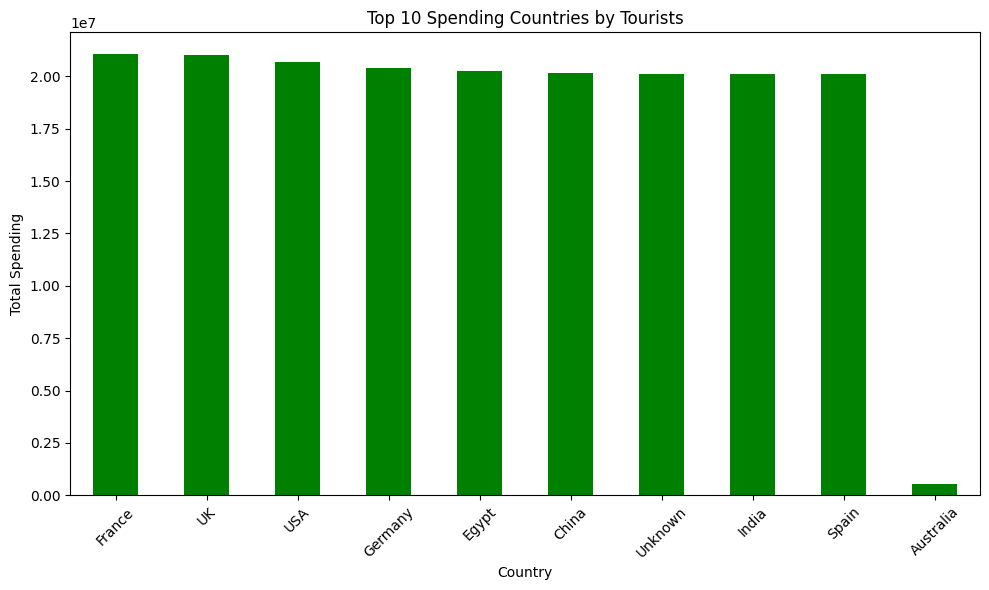

In [55]:
#Group by country and sum spending
country_spending = tourist_df_clean.groupby('Country')['Spending (USD)'].sum().sort_values(ascending=False)

#Sort top 10 countries by spending
top_10 = country_spending.head(10)

#Create a chart to show top 10 countries
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='green')
plt.title('Top 10 Spending Countries by Tourists')
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

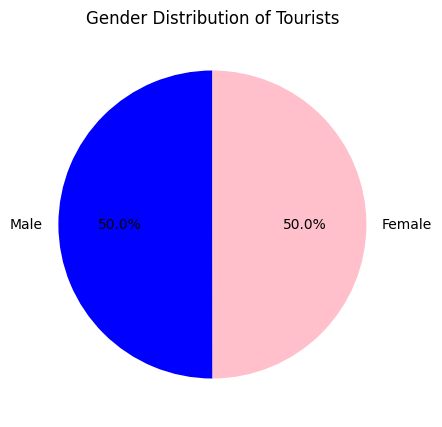

In [55]:
#Count gender occurrences
gender_counts = tourist_df_clean['Gender'].value_counts()

#Create a pie chart to show gender distribution
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Gender Distribution of Tourists')
plt.show()

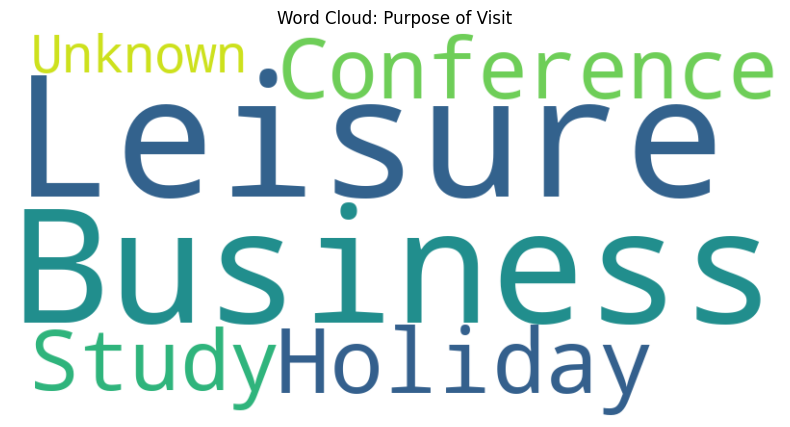

In [64]:
#Create a word cloud to show purpose of visit
from wordcloud import WordCloud

purpose_counts = tourist_df_clean['Purpose of Visit'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(purpose_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Purpose of Visit")
plt.show()

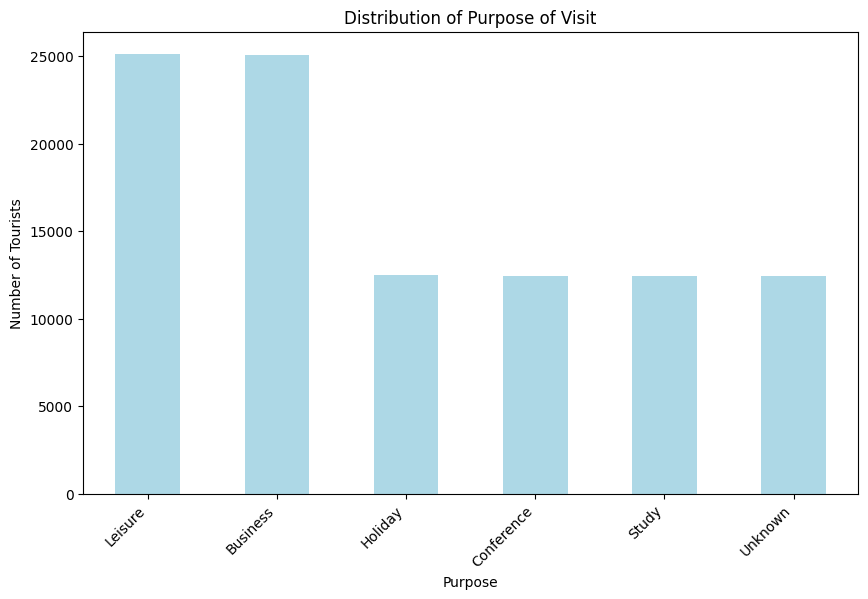

In [65]:
#Create a chart to show the purpose of visit
purpose_counts = tourist_df_clean['Purpose of Visit'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
purpose_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Purpose of Visit')
plt.xlabel('Purpose')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=45, ha='right')
plt.show()


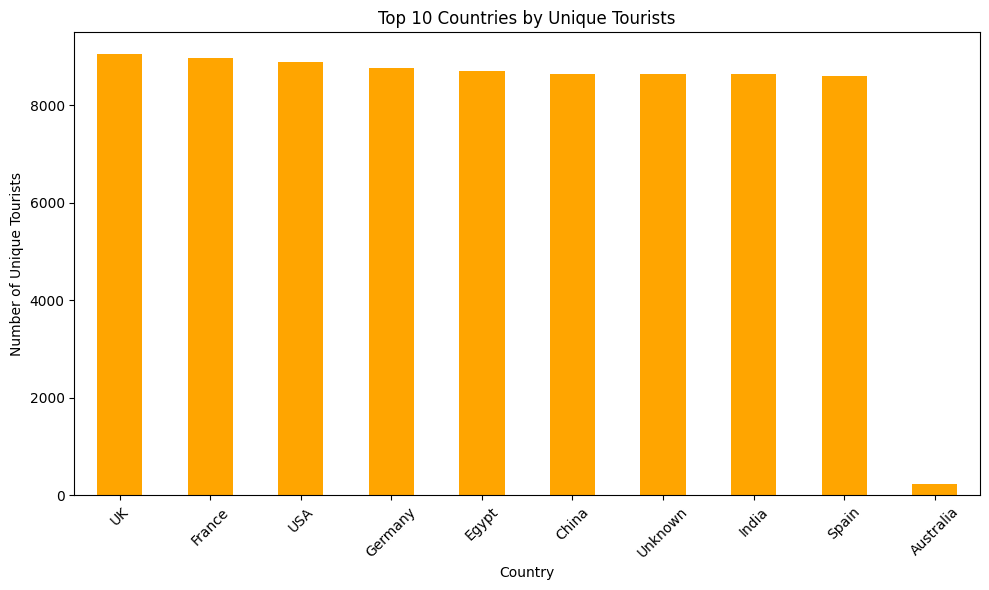

In [67]:
#Top 10 countries with most unique tourists
top_countries = (tourist_df_clean.groupby('Country')['Tourist ID'].nunique().sort_values(ascending=False).head(10))
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Unique Tourists')
plt.xlabel('Country')
plt.ylabel('Number of Unique Tourists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

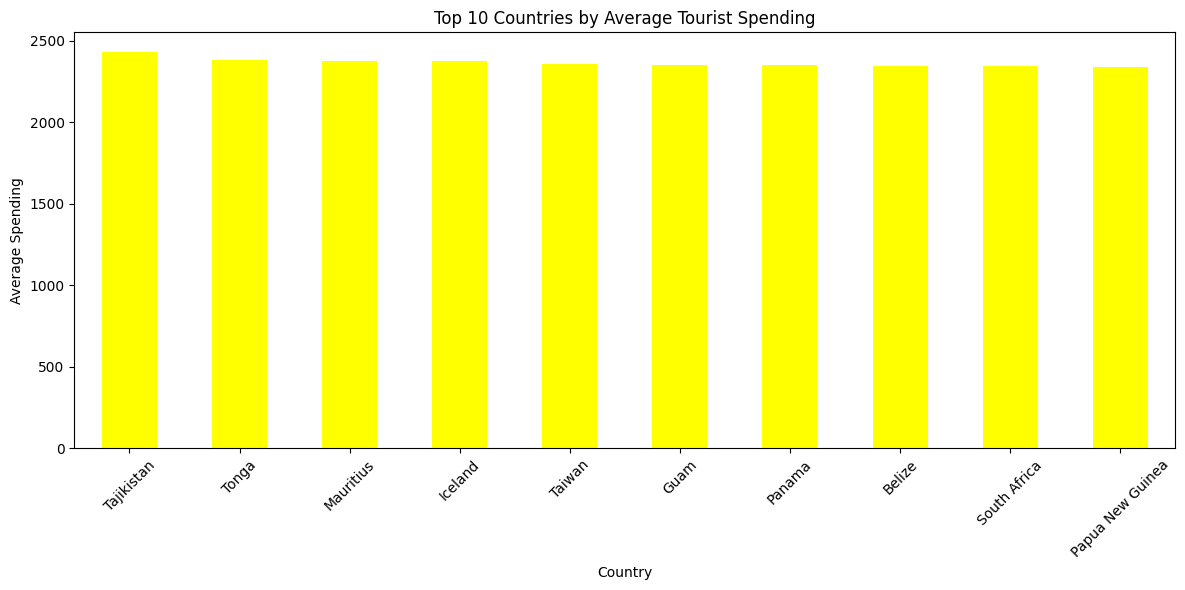

In [68]:
#Top 10 countries with highest average spending per tourist
avg_spending = tourist_df_clean.groupby('Country')['Spending (USD)'].mean().sort_values(ascending=False)
top_10 = avg_spending.head(10)
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', color='yellow')
plt.title('Top 10 Countries by Average Tourist Spending')
plt.xlabel('Country')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

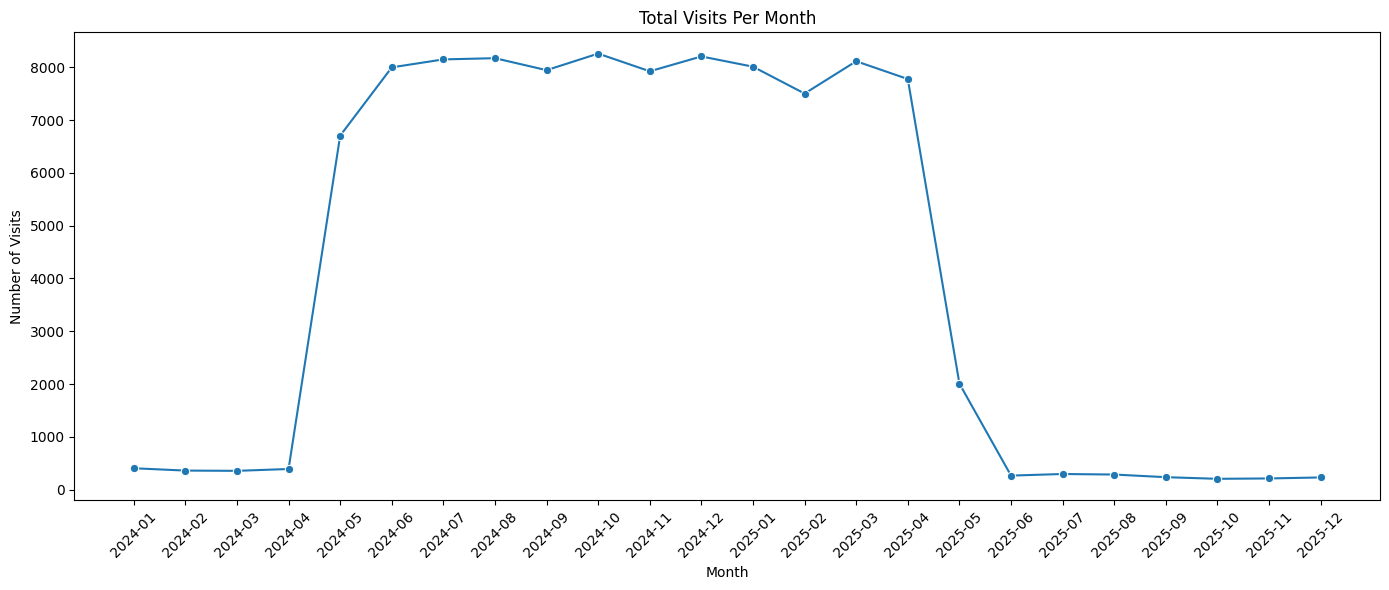

In [73]:
#Line chart to show total visits by month

visits_per_month = (tourist_df_clean.groupby(tourist_df_clean['Arrival Date'].dt.to_period('M')).size().reset_index(name='total_visits'))
visits_per_month['month_year'] = visits_per_month['Arrival Date'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=visits_per_month, x='month_year', y='total_visits', marker='o')

plt.title('Total Visits Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

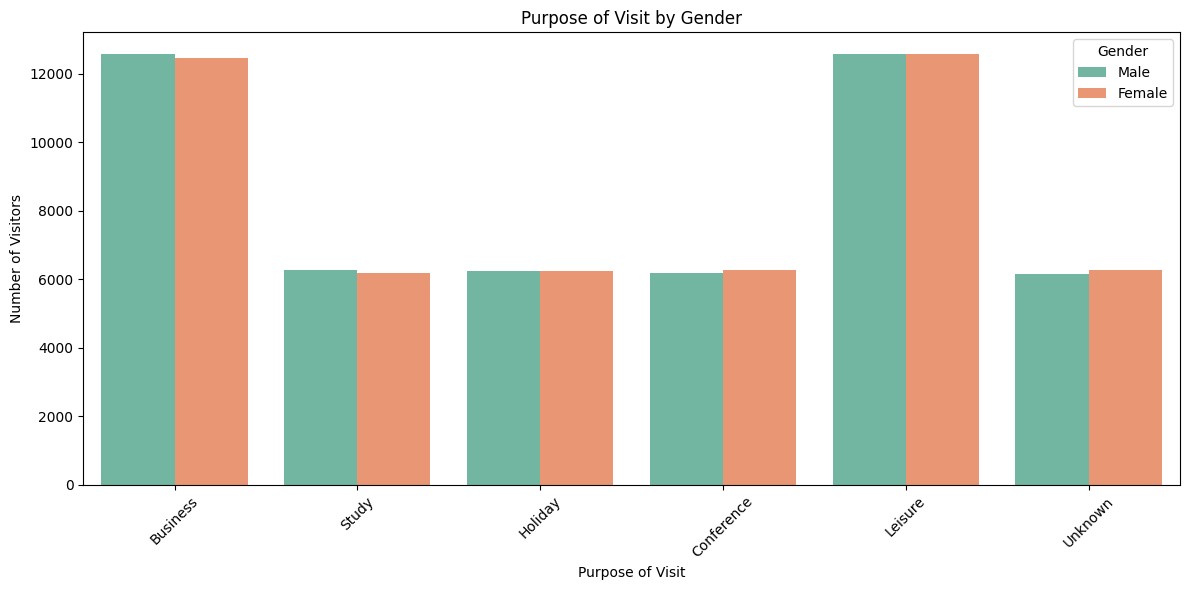

In [75]:
#Relationship between gender and purpose of visit
plt.figure(figsize=(12, 6))
sns.countplot(data=tourist_df_clean, x='Purpose of Visit', hue='Gender', palette='Set2')

plt.title('Purpose of Visit by Gender')
plt.xlabel('Purpose of Visit')
plt.ylabel('Number of Visitors')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\noore\AppData\Local\Temp\ipykernel_9432\1358960521.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = tourist_df_clean.groupby(['age_group', 'Purpose of Visit']).size().unstack(fill_value=0)


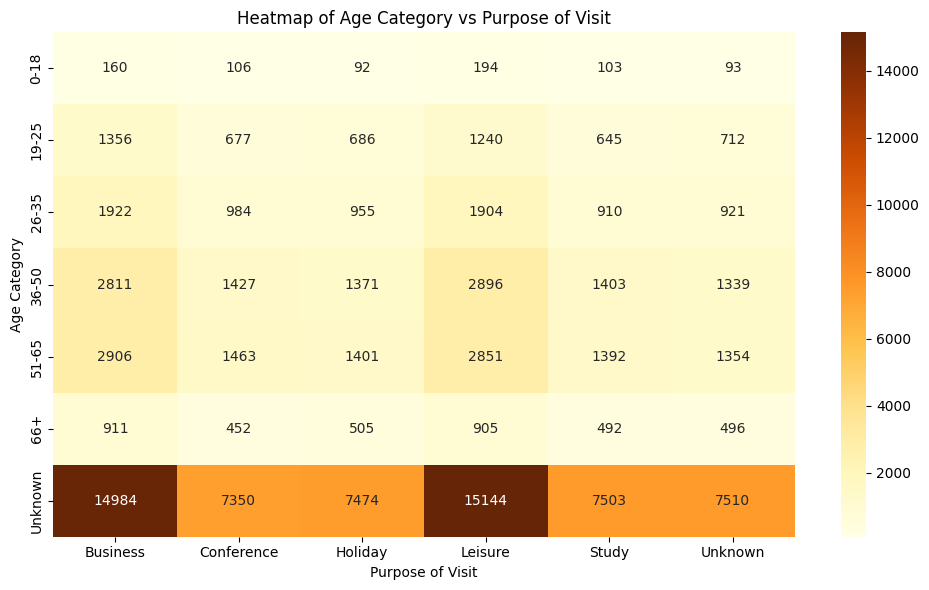

In [76]:
#Relatinship between age category and purpose of visit
heatmap_data = tourist_df_clean.groupby(['age_group', 'Purpose of Visit']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrBr')

plt.title('Heatmap of Age Category vs Purpose of Visit')
plt.xlabel('Purpose of Visit')
plt.ylabel('Age Category')
plt.tight_layout()
plt.show()

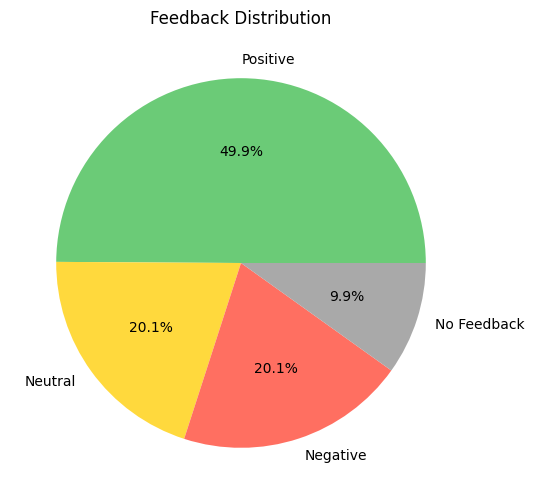

In [80]:
#Pie chart to show feedback
feedback_counts = tourist_df_clean['Feedback'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(feedback_counts, labels=feedback_counts.index, autopct='%1.1f%%', colors=['#6BCB77', '#FFD93D', '#FF6F61','#A9A9A9'])
plt.title('Feedback Distribution')
plt.show()

In [56]:
#Export the clean data to a csv file
tourist_df_clean.to_csv('Tourist data clean.csv', index=False)